# Import Library

In [3]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

import config

plt.style.use('fivethirtyeight')

# Twitter Authentication

In [18]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(config.CONSUMER_KEY, config.CONSUMER_SECRET)

# Set the access token and access token secret
authenticate.set_access_token(config.ACCESS_TOKEN, config.ACCESS_TOKEN_SECRET)

# Create the API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

# Extract Tweets from the Twitter user 

In [72]:
posts = api.user_timeline(screen_name = "realDonaldTrump", count=100, lang= "en", tweet_mode="extended")

# Print the last 5 tweet from the account
print("Show the 5 recent tweets: \n")
i = 1
for tweet in posts[0:5]:
    print(str(i) +  ') ' + tweet.full_text + '\n')
    i = i + 1

Show the 5 recent tweets: 

1) RT @nolaready: Primary threat from #Laura in #NOLA is storm surge outside the levee system. Could also see heavy rain, wind &amp; tornadoes if…

2) RT @NWS: Heads up! Today is the last day to prepare for Hurricane #Laura. Evacuation zones are based on potential storm surge. If an evacua…

3) RT @fema: Hurricane #Laura is moving quickly.  Be sure to follow @NHC_Atlantic for the latest updates &amp; heed instructions from your local o…

4) RT @GovAbbott: Texans should heed guidance from local officials as #HurricaneLaura approaches.

Local mandatory evacuations: Jefferson Coun…

5) RT @TDEM: Deadly storm surge will accompany #HurricaneLaura in some areas along the coast.  

Residents of the Upper #Texas coastlines shou…



In [73]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

df.head()

,Tweets
0,RT @nolaready: Primary threat from #Laura in #...
1,RT @NWS: Heads up! Today is the last day to pr...
2,RT @fema: Hurricane #Laura is moving quickly. ...
3,RT @GovAbbott: Texans should heed guidance fro...
4,RT @TDEM: Deadly storm surge will accompany #H...


In [74]:
# Create a function to clean the tweets
def cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Removed @mentions
    text = re.sub(r'#', '', text) #Removing the '#' symbol
    text = re.sub(r'RT[\s]+', '', text) # Removing RT
    text = re.sub(r'https?:\/\/\S+', '', text) # Remove the hyper link
    
    return text

df['Tweets'] = df['Tweets'].apply(cleanText)

df

,Tweets
0,: Primary threat from Laura in NOLA is storm s...
1,: Heads up! Today is the last day to prepare f...
2,: Hurricane Laura is moving quickly. Be sure ...
3,: Texans should heed guidance from local offic...
4,: Deadly storm surge will accompany HurricaneL...
...,...
95,Many doctors and studies disagree with this!
96,: Trey Gowdy: Brennan was either inaccurate or...
97,"The deep state, or whoever, over at the FDA is..."
98,Why would Suburban Women vote for Biden and th...


In [75]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,: Primary threat from Laura in NOLA is storm s...,0.350000,0.066667
1,: Heads up! Today is the last day to prepare f...,0.533333,0.000000
2,: Hurricane Laura is moving quickly. Be sure ...,0.596296,0.333333
3,: Texans should heed guidance from local offic...,0.000000,0.000000
4,: Deadly storm surge will accompany HurricaneL...,0.200000,-0.100000
...,...,...,...
95,Many doctors and studies disagree with this!,0.500000,0.625000
96,: Trey Gowdy: Brennan was either inaccurate or...,0.366667,-0.437500
97,"The deep state, or whoever, over at the FDA is...",0.475000,-0.162500
98,Why would Suburban Women vote for Biden and th...,0.377778,0.144444


# Word Cloud

(-0.5, 499.5, 299.5, -0.5)

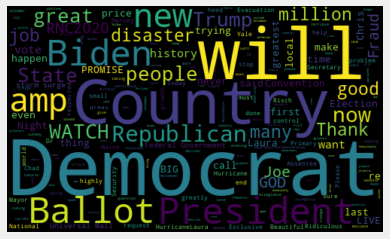

In [76]:
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height=300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')

In [77]:
# Create a function to compute the negative, neutral, and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,: Primary threat from Laura in NOLA is storm s...,0.350000,0.066667,Positive
1,: Heads up! Today is the last day to prepare f...,0.533333,0.000000,Neutral
2,: Hurricane Laura is moving quickly. Be sure ...,0.596296,0.333333,Positive
3,: Texans should heed guidance from local offic...,0.000000,0.000000,Neutral
4,: Deadly storm surge will accompany HurricaneL...,0.200000,-0.100000,Negative
...,...,...,...,...
95,Many doctors and studies disagree with this!,0.500000,0.625000,Positive
96,: Trey Gowdy: Brennan was either inaccurate or...,0.366667,-0.437500,Negative
97,"The deep state, or whoever, over at the FDA is...",0.475000,-0.162500,Negative
98,Why would Suburban Women vote for Biden and th...,0.377778,0.144444,Positive


# Print all of the positive tweets

In [78]:
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') ' + sortedDF['Tweets'][i])
        print()
        j = j + 1

1) : Primary threat from Laura in NOLA is storm surge outside the levee system. Could also see heavy rain, wind &amp; tornadoes if…

2) : Hurricane Laura is moving quickly.  Be sure to follow _Atlantic for the latest updates &amp; heed instructions from your local o…

3) ...They must stop calling these anarchists and agitators “peaceful protestors”. Come back into the real world! The Federal Government is ready to end this problem immediately upon your request.

4) I am pleased to inform the American Public that Acting Secretary Chad Wolf will be nominated to be the Secretary of Homeland Security. Chad has done an outstanding job and we greatly appreciate his service!

5) ...More JOBS from Eastport, Cutler, &amp; Jonesport to Stonington, Friendship, and Casco Bay. I am proud to help the great people of Maine!

6) Beautiful Maine Lobsters will now move tariff-free to Europe! For first time in many years. GREAT new deal by USTR levels playing field with Canada. Millions of $’s more in EX

# Print the negative tweets

In [79]:
j = 1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ')' + sortedDF['Tweets'][i])
        print()
        j = j + 1

1): Deadly storm surge will accompany HurricaneLaura in some areas along the coast.  

Residents of the Upper Texas coastlines shou…

2)For our Country to be sending 80 million UNSOLICITED BALLOTS is very unfair and a roadmap to disaster. Even recent small and easier to control elections which did this are a catastrophic disaster. Fraudulent &amp; missing Ballots like never seen before. 20% and 30% off. STOP!

3)Joe Biden has said he would lock down the Country again. That’s crazy! We’re having record job growth and a booming stock market, but Joe would end it all and close it all down. Ridiculous!

4): President  on disastrous Universal Mail-In Ballots 

5)All the Radical Left Democrats are trying to do with the Post Office hearings is blame the Republicans for the FRAUD that will occur because of the 51 Million Ballots that are being sent to people who have not even requested them. They are setting the table for a BIG MESS!

6)Incredible that  &amp; MSDNC aren’t covering the Roll Cal

# Plot the polarity and the subjectivity

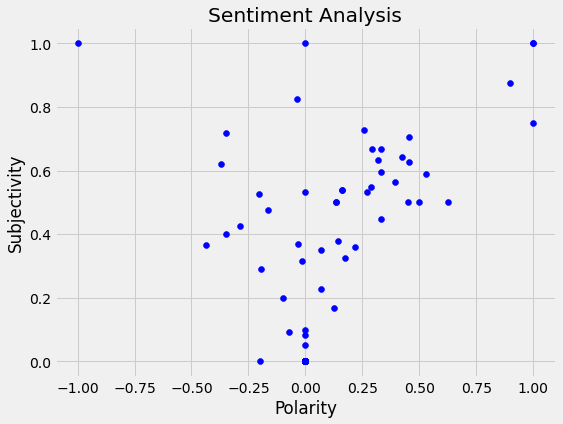

In [80]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [81]:
# Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0]) * 100, 1)

30.0

In [82]:
# Get the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round((ntweets.shape[0] / df.shape[0]) * 100, 1)

15.0

# Plot and visualize the sentiment

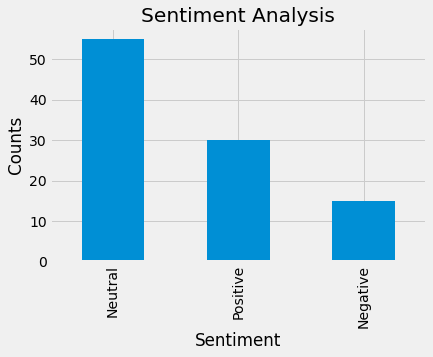

In [83]:
#Show the value counts
df['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()